In [3]:
import os
import sys
from pathlib import Path
base_dir = str(Path(Path.cwd()).resolve().parent.parent)
print(base_dir)
sys.path.append(base_dir)
import json

B:\data_science_projects\erdos_institute\aware-nlp


## Load all chunked documents

In [9]:
from langchain_community.document_loaders import DataFrameLoader
import pandas as pd

all_chunks_df = pd.read_csv('../../data/best_buy/all_chunked_documents.csv')
all_chunks_df.reset_index(names=['chunk_id'], inplace=True)
loader = DataFrameLoader(all_chunks_df, 'statement')
all_docs = loader.load()
display(all_chunks_df)
display(all_docs)

chunk_id                                          statement reddit_id  \
0            0              Research Study Recruitment - Managers   12opsul   
1            1             ![gif](giphy|YmQLj2KxaNz58g7Ofg)  $50?   jgjgy9e   
2            2  bullshit on getting $50 its just a coupon to B...   jgjpqmp   
3            3                Sr role eliminated; Good luck y’all   12m0ozl   
4            4  I was there almost 5 years before my position ...   jg9its6   
...        ...                                                ...       ...   
5662      5662  You do realize you’re asking for a bonus while...   kttl60a   
5663      5663                                   HERE YOUR BONUS🥒   kttmfik   
5664      5664       What has leadership done to deserve a bonus?   kttj3mt   
5665      5665  Board meeting finished this week.  It’s always...   ktt37u3   
5666      5666                                        It won’t be   kttck0f   

     aware_post_type     aware_created_ts reddit_link_id reddit_parent_id  \
0         submission  2023-04-16T17:32:45            NaN              NaN   
1            comment  2023-04-16T18:48:06     t3_12opsul       t3_12opsul   
2            comment  2023-04-16T19:55:39     t3_12opsul       t3_12opsul   
3         submission  2023-04-14T11:18:57            NaN              NaN   
4            comment  2023-04-14T14:52:47     t3_12m0ozl       t3_12m0ozl   
...              ...                  ...            ...              ...   
5662         comment  2024-03-07T16:11:30     t3_1b91wdi       t3_1b91wdi   
5663         comment  2024-03-07T16:18:42     t3_1b91wdi       t3_1b91wdi   
5664         comment  2024-03-07T15:59:47     t3_1b91wdi       t3_1b91wdi   
5665         comment  2024-03-07T14:20:49     t3_1b91wdi       t3_1b91wdi   
5666         comment  2024-03-07T15:22:55     t3_1b91wdi       t1_ktt455y   

                                       reddit_permalink reddit_subreddit  
0     /r/BestBuyWorkers/comments/12opsul/research_st...   BestBuyWorkers  
1     /r/BestBuyWorkers/comments/12opsul/research_st...   BestBuyWorkers  
2     /r/BestBuyWorkers/comments/12opsul/research_st...   BestBuyWorkers  
3     /r/BestBuyWorkers/comments/12m0ozl/sr_role_eli...   BestBuyWorkers  
4     /r/BestBuyWorkers/comments/12m0ozl/sr_role_eli...   BestBuyWorkers  
...                                                 ...              ...  
5662  /r/BestBuyWorkers/comments/1b91wdi/sti_bonus/k...   BestBuyWorkers  
5663  /r/BestBuyWorkers/comments/1b91wdi/sti_bonus/k...   BestBuyWorkers  
5664  /r/BestBuyWorkers/comments/1b91wdi/sti_bonus/k...   BestBuyWorkers  
5665  /r/BestBuyWorkers/comments/1b91wdi/sti_bonus/k...   BestBuyWorkers  
5666  /r/BestBuyWorkers/comments/1b91wdi/sti_bonus/k...   BestBuyWorkers  

[5667 rows x 9 columns]

[Document(page_content='Research Study Recruitment - Managers', metadata={'chunk_id': 0, 'reddit_id': '12opsul', 'aware_post_type': 'submission', 'aware_created_ts': '2023-04-16T17:32:45', 'reddit_link_id': nan, 'reddit_parent_id': nan, 'reddit_permalink': '/r/BestBuyWorkers/comments/12opsul/research_study_recruitment_managers/', 'reddit_subreddit': 'BestBuyWorkers'}),
 Document(page_content='![gif](giphy|YmQLj2KxaNz58g7Ofg)  $50?', metadata={'chunk_id': 1, 'reddit_id': 'jgjgy9e', 'aware_post_type': 'comment', 'aware_created_ts': '2023-04-16T18:48:06', 'reddit_link_id': 't3_12opsul', 'reddit_parent_id': 't3_12opsul', 'reddit_permalink': '/r/BestBuyWorkers/comments/12opsul/research_study_recruitment_managers/jgjgy9e/', 'reddit_subreddit': 'BestBuyWorkers'}),
 Document(page_content="bullshit on getting $50 its just a coupon to Bennigan's", metadata={'chunk_id': 2, 'reddit_id': 'jgjpqmp', 'aware_post_type': 'comment', 'aware_created_ts': '2023-04-16T19:55:39', 'reddit_link_id': 't3_12opsu

#### Load retriever to be used for it's encoder

In [16]:
from src.retriever import CustomRetriever
retriever = CustomRetriever(all_docs, 'all-mpnet-base-v1', 'cosine-similarity')
retriever._initialize_embedding_model()

## Augment Cluster implementation based on the scores on the multi-label dataset

#### Load embeddings, reduced embedding projections, and dataframes containing happy/unhappy/irrelevant labels

In [11]:
import numpy as np
import pandas as pd

embeddings = np.load('../../data/best_buy/embeddings/all-mpnet-base-v1-chunks-embedded.npz.npy')
df = pd.read_csv('../../data/best_buy/labeling/workers_happy_unhappy_all.csv').sort_values('chunk_id')
df_all = pd.read_csv('../../data/best_buy/labeling/workers_happy_unhappy_all_with_metadata.csv')
reduced_embeddings = np.load('../../data/best_buy/embeddings/all-mpnet-base-v1-chunks-embedded-reduced.npz')

## Exploratory Data Analysis

##### Pick a few "relevant" labeled cases"

In [4]:
from src.util.string_formatting import wrap_text

In [13]:

selected_negative_ids = [1416, 4921, 827,  651, 222]
selected_positive_ids = [3777, 1732, 32, 1151, 1731]

print('\n========================= Selected Positive Statements ================================\n')

for i in selected_positive_ids:
    print(wrap_text(df_all[df_all.chunk_id==i]['statement'].values[0], 20))
    print()

print('\n========================= Selected Negative Statements ================================\n')
for i in selected_negative_ids:
    print(wrap_text(df_all[df_all.chunk_id==i]['statement'].values[0], 20))
    print()


========================= Selected Positive Statements ================================

It’s not as bad as people make it out to be. Before I started working here everyone on Reddit made 
 me paranoid and worried about working here and stressed out about working here before I started and when I 
 started I was waiting for something bad to happened and it never did. I guess I have my cool 
 managers and cool coworkers to thank for that. Your experience will solely depend on how chill your coworkers and 
 managers are. For example my store doesn’t pressure us to sell memberships, they just occasionally help us and give 
 us tips on how to do a better pitch for it. Most chill job I ever worked for. Maybe 
 im lucky but you could easily be just as lucky. I enjoy it here despite All the bs u may hear about this place

1. Work environment will vary depending on the management at the store. I have worked in 3 best buy locations 
 and all of them were phenomenal, but I also know every store 

### Encode a few selective keywords and project to the reduced space

In [17]:
selected_positive_ids = [31, 32, 1151, 1731]
selected_negative_ids = [943, 257, 651, 222]
keywords = [
    'Corie Barry',
    'happy',
    'unhappy',
    'layoffs',
    'satisfied',
    'unsatisfied',
    'reduction in hours',
    'quit',
    'fired',
    "management", 
    "leadership",
    "Are employees happy with the management?",
    "Are employess unhappy with the management?",
    "Are employees unsatisfied with management?",
    "Are employees satisfied with management?",
    "Are employees happy with the shcheduling of their hours?",
    "Are employees unhappy with the scheduling of their hours?",
    "Are employees satisfied working at Best Buy?",
    "Are employees unsatisfied working at Best Buy?",
]
# 
keyword_embeddings = [retriever.encoder.encode(keyword) for keyword in keywords]

# Stack the keyword embeddings with the embeddings of the chunks
embedddings_with_keywords = np.concatenate([embeddings, keyword_embeddings], axis=0)

#### Run dimensional reduction on the embeddings of chunks and keywords/questions

In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
from sklearn.pipeline import Pipeline
# import tsne
# from sklearn.manifold import TSNE
reductions = {
    'PCA-TSNE': Pipeline([('PCA', PCA(n_components=10)), ('TSNE', TSNE(n_components=2))]),
    'PCA': PCA(n_components=2),
    'Isomap': Isomap(n_components=2),
    'LLE': LocallyLinearEmbedding(n_components=2),
    #'Spectral Embedding': SpectralEmbedding(n_components=2)
}
n_chunks = embeddings.shape[0]
reduced_embeddings = {}
reduced_keywords = {}
transformed_embeddings = {}
for name, reduction in reductions.items():
    print(f'Running {name}...')
    transformed_embeddings[name] = reduction.fit_transform(embedddings_with_keywords)
    reduced_embeddings[name] = transformed_embeddings[name][:n_chunks,:]
    reduced_keywords[name] = transformed_embeddings[name][n_chunks:,:]

Running PCA-TSNE...
Running PCA...
Running Isomap...
Running LLE...


##### Calculate similarity

In [19]:

from sklearn.metrics.pairwise import cosine_similarity
keyword_similarities = []
for keyword_embedding in keyword_embeddings:
    keyword_similarities.append([cosine_similarity([keyword_embedding], [worker_embedding])[0][0] for worker_embedding in embeddings])

##### Plot keywords in the projected space compared to selected answers

C:\Users\peter\AppData\Local\Temp\ipykernel_6936\1680021897.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


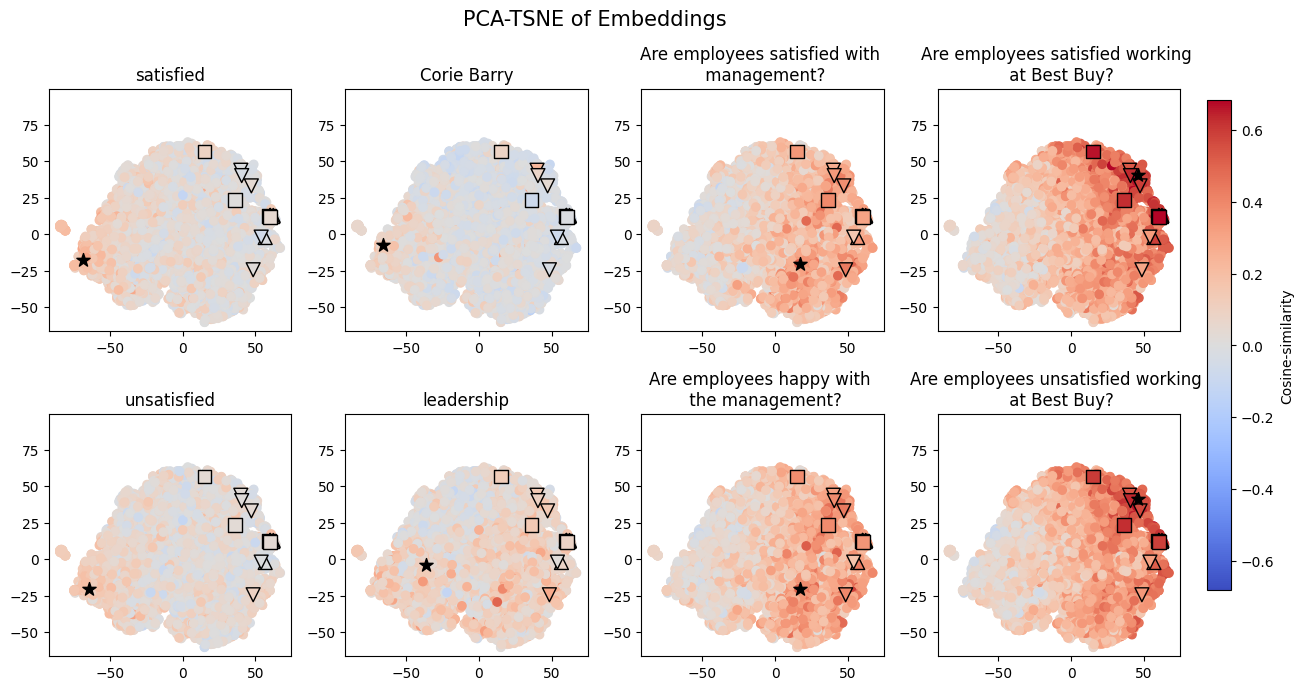

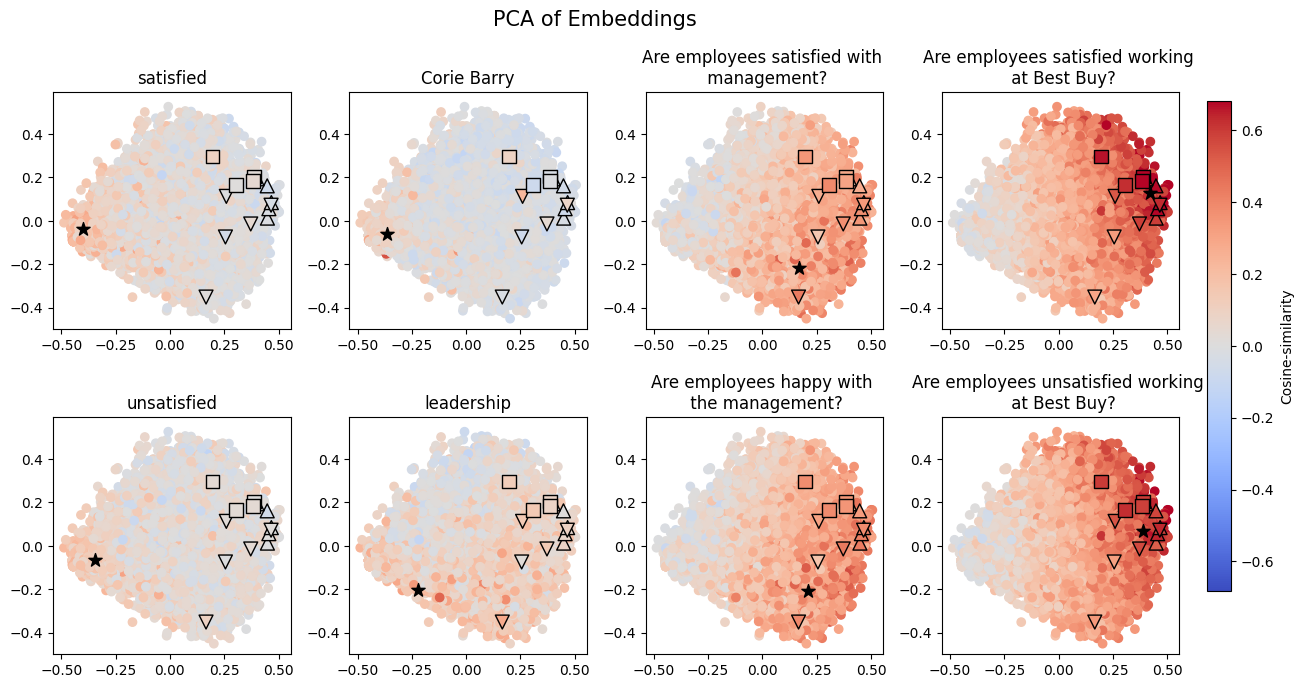

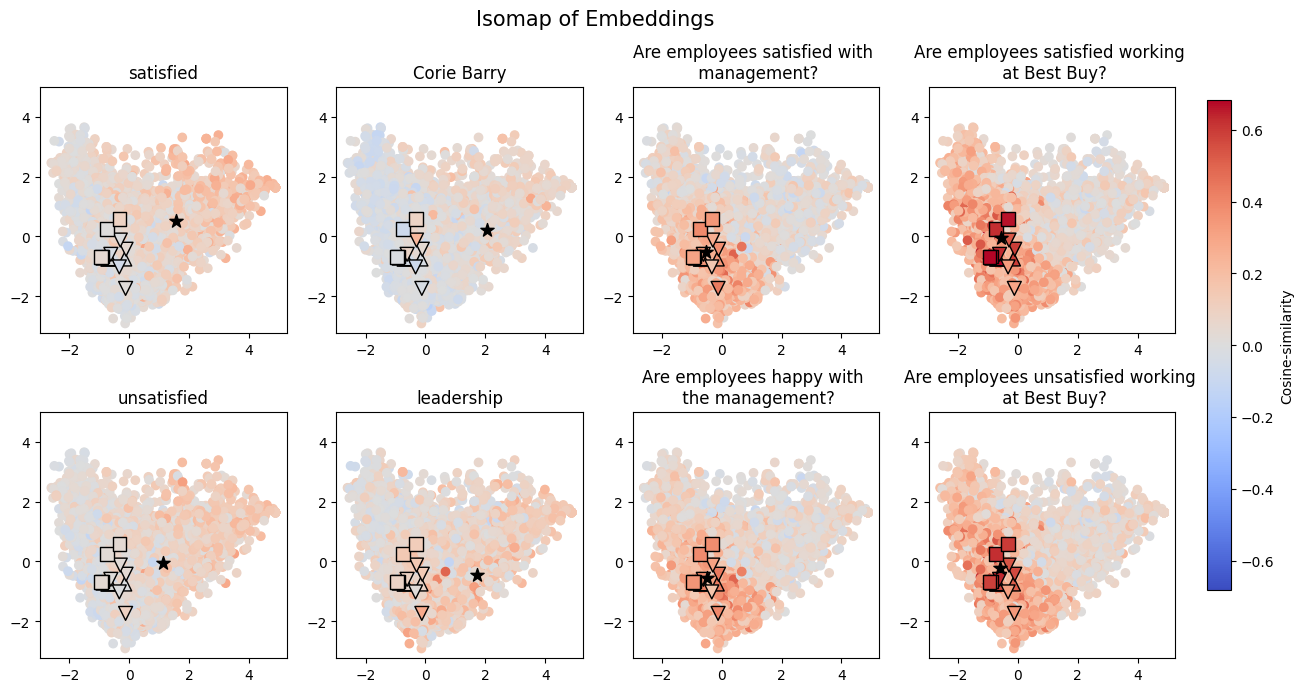

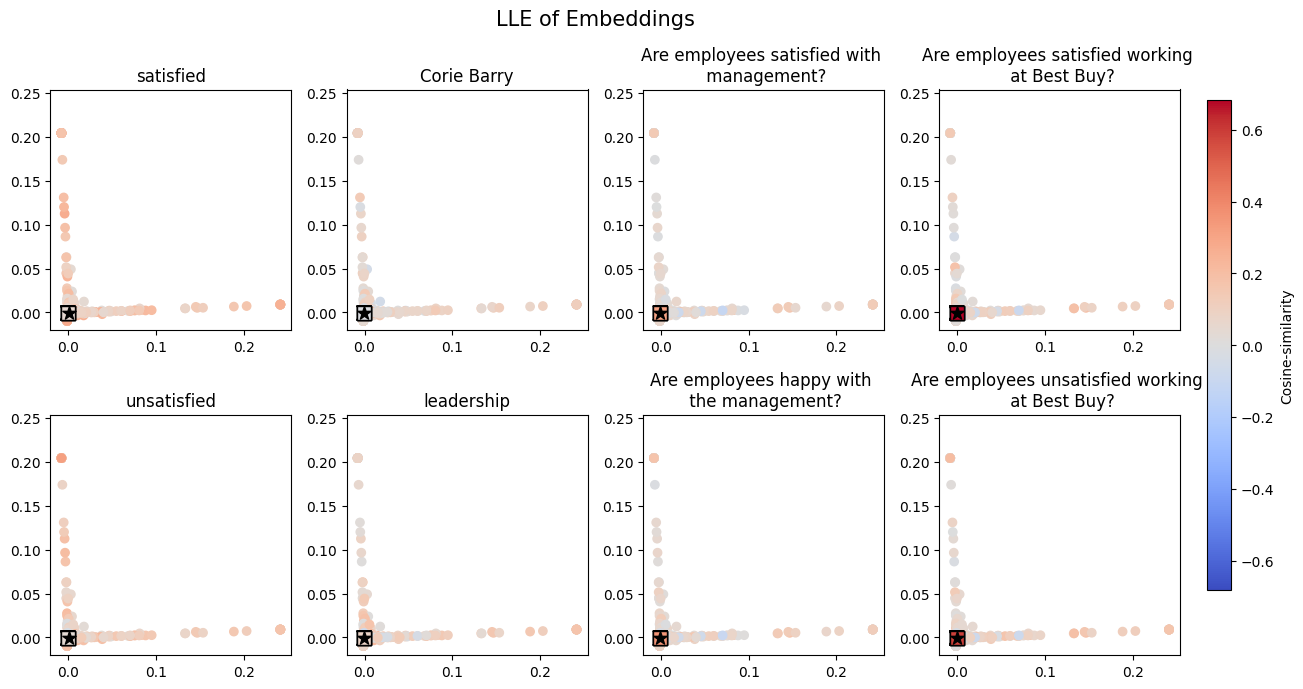

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

selected_keywords = [
    'satisfied',
    'Corie Barry',
    "Are employees satisfied with management?",
    "Are employees satisfied working at Best Buy?",
    'unsatisfied',
    "leadership",
    "Are employees happy with the management?",
    "Are employees unsatisfied working at Best Buy?",
]
selected_keyword_indices = [keywords.index(keyword) for keyword in selected_keywords]

selected_keyword_similarities = np.array(keyword_similarities)[selected_keyword_indices]
selected_keyword_embeddings = np.array(keyword_embeddings)[selected_keyword_indices]

for reduction_name in reduced_embeddings.keys():
    reduced_keyword_vectors = np.array(reduced_keywords[reduction_name])[selected_keyword_indices]

    # Plot the reduced embeddings as different figures in the same plot
    reducer = reductions[reduction_name]
    reduced_vectors = reduced_embeddings[reduction_name]

    max_abs_dist = np.max(np.abs(selected_keyword_similarities)) * 0.9
    min_dist = -max_abs_dist - 0.01
    max_dist = max_abs_dist + 0.01


    selected_negative_ids = [1416, 4921, 827,  651, 222]
    selected_positive_ids = [3777, 1732, 32, 1151, 1731]
    selected_irrelevant_ids = [4855, 3062, 1727, 4867]
    # Create a figure with subplots
    fig = plt.figure(figsize=(12, 7))
    for ind, (keyword, reduced_keyword_vector, keyword_similarities_slice) in enumerate(zip(selected_keywords, reduced_keyword_vectors, selected_keyword_similarities)):
        dist = keyword_similarities_slice
        
        reduced_vectors = reduced_embeddings[reduction_name]

        ax = fig.add_subplot(2,4, ind + 1)
        inds_excluding_selected = list(set(range(len(reduced_vectors))) - set(selected_positive_ids) -  set(selected_negative_ids) - set(selected_irrelevant_ids))
        im = ax.scatter(reduced_vectors[inds_excluding_selected, 0], reduced_vectors[inds_excluding_selected, 1], c=keyword_similarities_slice[inds_excluding_selected], cmap='coolwarm', vmin=min_dist, vmax=max_dist)
        im = ax.scatter(reduced_vectors[selected_positive_ids, 0], reduced_vectors[selected_positive_ids, 1], c=keyword_similarities_slice[selected_positive_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = '^', s = 100)
        im = ax.scatter(reduced_vectors[selected_negative_ids, 0], reduced_vectors[selected_negative_ids, 1], c=keyword_similarities_slice[selected_negative_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = 'v', s = 100)
        im = ax.scatter(reduced_vectors[selected_irrelevant_ids, 0], reduced_vectors[selected_irrelevant_ids, 1], c=keyword_similarities_slice[selected_irrelevant_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = 's', s = 100)

        ax.scatter(reduced_keyword_vector[0], reduced_keyword_vector[1], marker='*', color='k', s=100)
        ax.set_title(f'{wrap_text(keyword, n_words = 4)}')
        ax.axis('square')
    fig.suptitle(f'{reduction_name} of Embeddings', fontsize=15)
    # Add colorbar to the figure with title "Cosine-similarity" on the right
    cax = fig.add_axes([1.01, 0.15, 0.02, 0.7])  # Adjust the position of the colorbar
    fig.colorbar(im, cax=cax, label='Cosine-similarity')
    # Show the plots
    plt.tight_layout()
    plt.show()

C:\Users\peter\AppData\Local\Temp\ipykernel_20036\1192466219.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


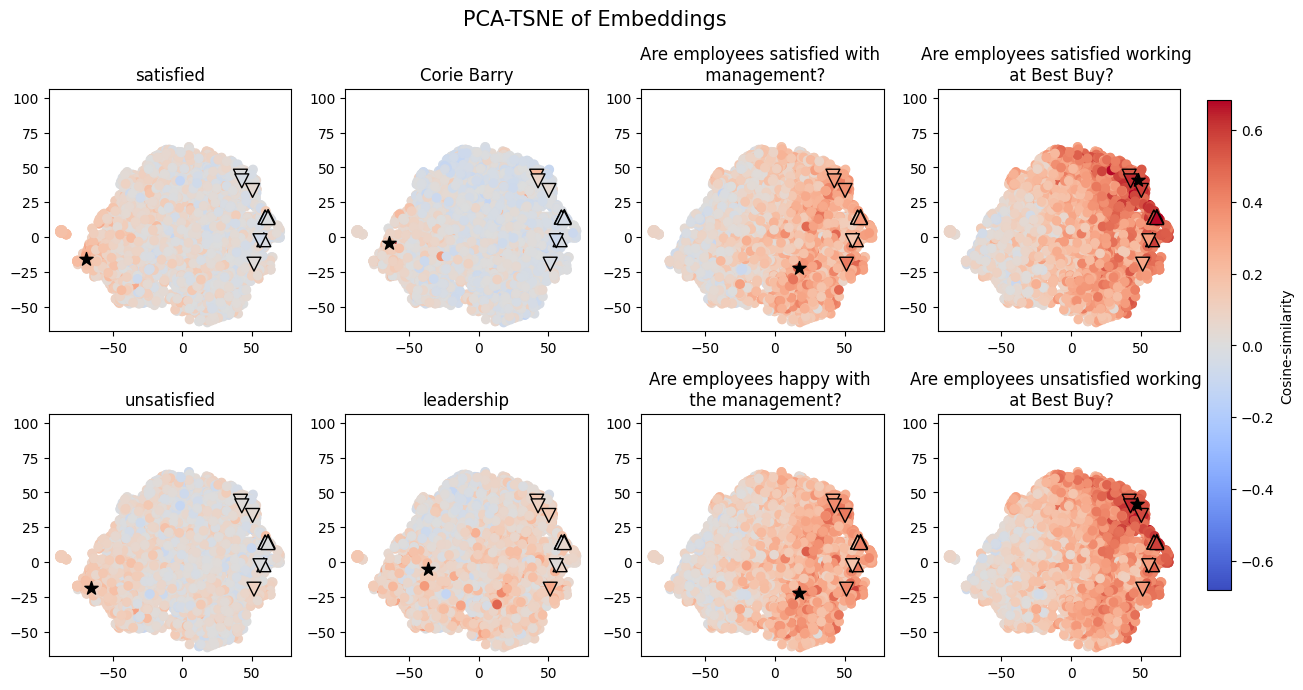

In [116]:
from matplotlib import pyplot as plt
import seaborn as sns

reduction_name = 'PCA-TSNE'
selected_keywords = [
    'satisfied',
    'Corie Barry',
    "Are employees satisfied with management?",
    "Are employees satisfied working at Best Buy?",
    'unsatisfied',
    "leadership",
    "Are employees happy with the management?",
    "Are employees unsatisfied working at Best Buy?",
]
selected_keyword_indices = [keywords.index(keyword) for keyword in selected_keywords]

selected_keyword_similarities = np.array(keyword_similarities)[selected_keyword_indices]
selected_keyword_embeddings = np.array(keyword_embeddings)[selected_keyword_indices]
reduced_keyword_vectors = np.array(reduced_keywords[reduction_name])[selected_keyword_indices]

# Plot the reduced embeddings as different figures in the same plot
reducer = reductions[reduction_name]
reduced_vectors = reduced_embeddings[reduction_name]

max_abs_dist = np.max(np.abs(selected_keyword_similarities)) * 0.9
min_dist = -max_abs_dist - 0.01
max_dist = max_abs_dist + 0.01

selected_positive_ids = [31, 32, 1151, 1731]
selected_negative_ids = [943, 257, 651, 222]

selected_negative_ids = [1416, 4921, 827,  651, 222]
selected_positive_ids = [3777, 1732, 32, 1151, 1731]
# Create a figure with subplots
fig = plt.figure(figsize=(12, 7))
for ind, (keyword, reduced_keyword_vector, keyword_similarities_slice) in enumerate(zip(selected_keywords, reduced_keyword_vectors, selected_keyword_similarities)):
    dist = keyword_similarities_slice
    
    reduced_vectors = reduced_embeddings[reduction_name]

    ax = fig.add_subplot(2,4, ind + 1)
    inds_excluding_selected = list(set(range(len(reduced_vectors))) - set(selected_positive_ids) -  set(selected_negative_ids))
    im = ax.scatter(reduced_vectors[inds_excluding_selected, 0], reduced_vectors[inds_excluding_selected, 1], c=keyword_similarities_slice[inds_excluding_selected], cmap='coolwarm', vmin=min_dist, vmax=max_dist)
    im = ax.scatter(reduced_vectors[selected_positive_ids, 0], reduced_vectors[selected_positive_ids, 1], c=keyword_similarities_slice[selected_positive_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = '^', s = 100)
    im = ax.scatter(reduced_vectors[selected_negative_ids, 0], reduced_vectors[selected_negative_ids, 1], c=keyword_similarities_slice[selected_negative_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = 'v', s = 100)

    ax.scatter(reduced_keyword_vector[0], reduced_keyword_vector[1], marker='*', color='k', s=100)
    ax.set_title(f'{wrap_text(keyword, n_words = 4)}')
    ax.axis('square')
fig.suptitle(f'{reduction_name} of Embeddings', fontsize=15)
# Add colorbar to the figure with title "Cosine-similarity" on the right
cax = fig.add_axes([1.01, 0.15, 0.02, 0.7])  # Adjust the position of the colorbar
fig.colorbar(im, cax=cax, label='Cosine-similarity')
# Show the plots
plt.tight_layout()
plt.show()

#### Look at all labels in the projected embedding space

C:\Users\peter\AppData\Local\Temp\ipykernel_20036\442393464.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


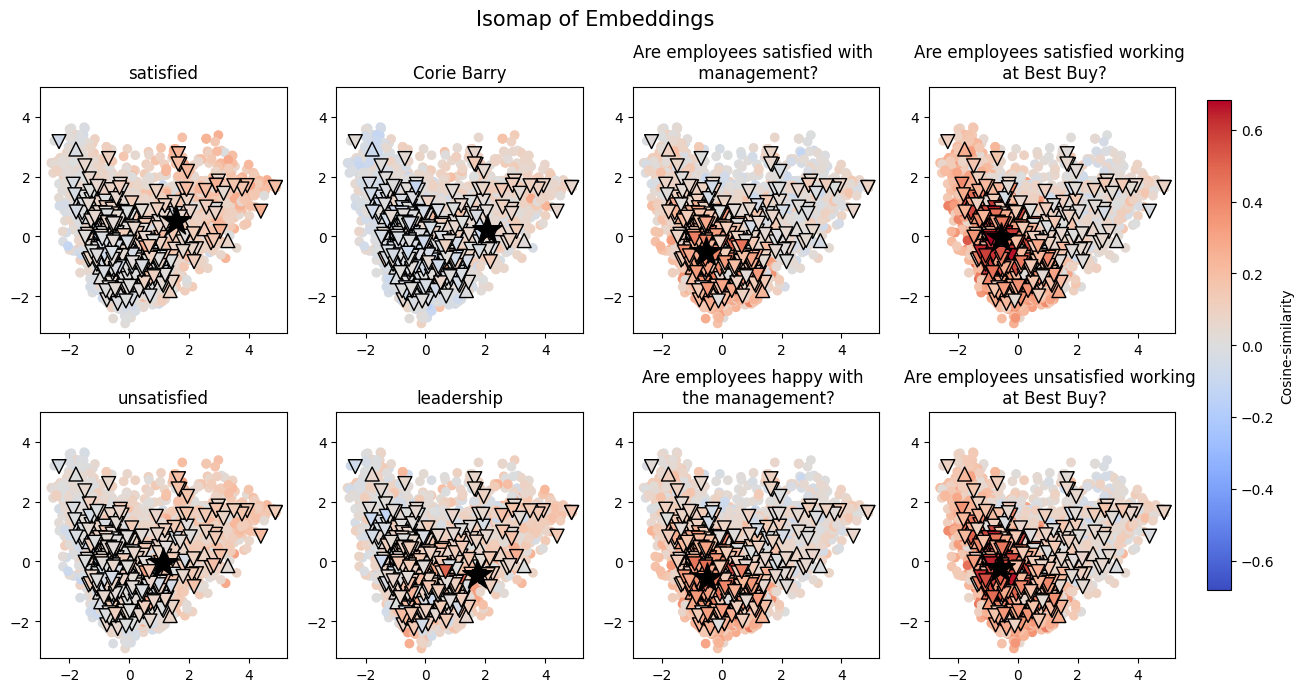

In [92]:
from matplotlib import pyplot as plt
import seaborn as sns

reduction_name = 'Isomap'
selected_keywords = [
    'satisfied',
    'Corie Barry',
    "Are employees satisfied with management?",
    "Are employees satisfied working at Best Buy?",
    'unsatisfied',
    "leadership",
    "Are employees happy with the management?",
    "Are employees unsatisfied working at Best Buy?",
]
selected_keyword_indices = [keywords.index(keyword) for keyword in selected_keywords]

selected_keyword_similarities = np.array(keyword_similarities)[selected_keyword_indices]
selected_keyword_embeddings = np.array(keyword_embeddings)[selected_keyword_indices]
reduced_keyword_vectors = np.array(reduced_keywords[reduction_name])[selected_keyword_indices]

# Plot the reduced embeddings as different figures in the same plot
reducer = reductions[reduction_name]
reduced_vectors = reduced_embeddings[reduction_name]

max_abs_dist = np.max(np.abs(selected_keyword_similarities)) * 0.9
min_dist = -max_abs_dist - 0.01
max_dist = max_abs_dist + 0.01

positive_ids = df_all[df_all.label==1].index
negative_ids = df_all[df_all.label==-1].index
selected_positive_ids = positive_ids
selected_negative_ids = negative_ids
# Create a figure with subplots
fig = plt.figure(figsize=(12, 7))
for ind, (keyword, reduced_keyword_vector, keyword_similarities_slice) in enumerate(zip(selected_keywords, reduced_keyword_vectors, selected_keyword_similarities)):
    dist = keyword_similarities_slice
    
    reduced_vectors = reduced_embeddings[reduction_name]

    ax = fig.add_subplot(2,4, ind + 1)
    inds_excluding_selected = list(set(range(len(reduced_vectors))) - set(selected_positive_ids) -  set(selected_negative_ids))
    im = ax.scatter(reduced_vectors[inds_excluding_selected, 0], reduced_vectors[inds_excluding_selected, 1], c=keyword_similarities_slice[inds_excluding_selected], cmap='coolwarm', vmin=min_dist, vmax=max_dist)
    im = ax.scatter(reduced_vectors[selected_positive_ids, 0], reduced_vectors[selected_positive_ids, 1], c=keyword_similarities_slice[selected_positive_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = '^', s = 100)
    im = ax.scatter(reduced_vectors[selected_negative_ids, 0], reduced_vectors[selected_negative_ids, 1], c=keyword_similarities_slice[selected_negative_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = 'v', s = 100)

    ax.scatter(reduced_keyword_vector[0], reduced_keyword_vector[1], marker='*', color='k', s=500)
    ax.set_title(f'{wrap_text(keyword, n_words = 4)}')
    ax.axis('square')
fig.suptitle(f'{reduction_name} of Embeddings', fontsize=15)
# Add colorbar to the figure with title "Cosine-similarity" on the right
cax = fig.add_axes([1.01, 0.15, 0.02, 0.7])  # Adjust the position of the colorbar
fig.colorbar(im, cax=cax, label='Cosine-similarity')
# Show the plots
plt.tight_layout()
plt.show()

## Clustering

In [138]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, HDBSCAN

#### Define clustering metrics and scan hyperparameters and cluster methods using metrics of:
1. Homogeneity: how alike in label (1, -1, 0) are members of the same cluster
2. Completeness: how good of a job has clustering done to ensure all the data points that are members of a given class are elements of the same cluster.
3. v1 measure: the harmonic mean of homogeneity and completeness
4. Cross-Entropy: the log-loss of the labels and those "predicted" by the majority class of the cluster

In [139]:
from sklearn.metrics import log_loss, homogeneity_score, v_measure_score, completeness_score
from typing import Dict

def calc_prob(label_list: pd.Series, unique_labels = [-1,1,0]) -> pd.Series:
    output = (label_list.value_counts()/label_list.value_counts().sum()).reset_index()
    output = pd.merge(output, pd.DataFrame({'label':unique_labels}), how='outer').fillna(0).sort_values('label').set_index('label')
    return output.values.T[0].tolist()

def calc_mode(label_list: pd.Series) -> pd.Series:
    return pd.Series([np.mean(val) for val in label_list.mode().values])

def calc_metrics(df_labeled) -> Dict[str, float]:
    cluster_probs = df_labeled[['cluster','label']].groupby('cluster').agg(calc_prob).reset_index().rename(columns={'label':'cluster_probs'})
    if 'cluster_probs' in df_labeled.columns:
        df_labeled = df_labeled.drop(columns=['cluster_probs'])
    df_labeled = df_labeled.merge(cluster_probs, on='cluster')
    cluster_probs = np.array([np.array(row) for row in df_labeled.cluster_probs.values])
    
    return {
        'homogeneity': homogeneity_score(df_labeled['label'], df_labeled['cluster']),
        'completeness': completeness_score(df_labeled['label'], df_labeled['cluster']),
        'v_measure': v_measure_score(df_labeled['label'], df_labeled['cluster']),
        'cross-entropy': log_loss(df_labeled.label.values, cluster_probs, labels=[-1,0,1]),
    }

In [22]:
reduction_name = 'Isomap'
reduced_vectors = reduced_embeddings[reduction_name]
clusterer_dict = {
    'AC_0.1' : AgglomerativeClustering(distance_threshold=0.1, compute_full_tree = True, n_clusters = None, linkage='complete'),
    'AC_0.15' : AgglomerativeClustering(distance_threshold=0.15, compute_full_tree = True, n_clusters = None, linkage='complete'),
    'AC_0.2' : AgglomerativeClustering(distance_threshold=0.2, compute_full_tree = True, n_clusters = None, linkage='complete'),
    'AC_0.25' : AgglomerativeClustering(distance_threshold=0.25, compute_full_tree = True, n_clusters = None, linkage='complete'),
    'AC_0.3' : AgglomerativeClustering(distance_threshold=0.3, compute_full_tree = True, n_clusters = None, linkage='complete'),
    'Kmeans_150': KMeans(init='k-means++', n_clusters = 150, n_init=50),
    'Kmeans_300': KMeans(init='k-means++', n_clusters = 300, n_init=100),
}
metric_summary = []
for name, clusterer in clusterer_dict.items():
    clusters = clusterer.fit(reduced_vectors)
    df_all['cluster'] = clusters.labels_
    df_labeled = df_all[~df_all.label.isna()]
    metrics_out = calc_metrics(df_labeled)
    context_dict = {
        'method':name, 
        'reduction method': reduction_name,
        '# of dimensions' : reduced_vectors.shape[1],
        '# of clusters': len(np.unique(clusters.labels_))
    }
    metric_summary.append(context_dict | metrics_out)
    display(pd.DataFrame([context_dict|metrics_out]))
pd.DataFrame(metric_summary)

method reduction method  # of dimensions  # of clusters  homogeneity  \
0  AC_0.1           Isomap                2           1502     0.774113   

   completeness  v_measure  cross-entropy  
0      0.101388   0.179294       0.179272

method reduction method  # of dimensions  # of clusters  homogeneity  \
0  AC_0.15           Isomap                2            999     0.673834   

   completeness  v_measure  cross-entropy  
0      0.092314   0.162383       0.258856

method reduction method  # of dimensions  # of clusters  homogeneity  \
0  AC_0.2           Isomap                2            738     0.587548   

   completeness  v_measure  cross-entropy  
0      0.083499   0.146218       0.327336

method reduction method  # of dimensions  # of clusters  homogeneity  \
0  AC_0.25           Isomap                2            567     0.517585   

   completeness  v_measure  cross-entropy  
0      0.076601   0.133452       0.382861

method reduction method  # of dimensions  # of clusters  homogeneity  \
0  AC_0.3           Isomap                2            440     0.463518   

   completeness  v_measure  cross-entropy  
0      0.071228    0.12348        0.42577

method reduction method  # of dimensions  # of clusters  homogeneity  \
0  Kmeans_150           Isomap                2            150     0.304343   

   completeness  v_measure  cross-entropy  
0      0.053482   0.090977       0.552097

method reduction method  # of dimensions  # of clusters  homogeneity  \
0  Kmeans_300           Isomap                2            300      0.43611   

   completeness  v_measure  cross-entropy  
0      0.068764   0.118796       0.447522

method reduction method  # of dimensions  # of clusters  homogeneity  \
0      AC_0.1           Isomap                2           1502     0.774113   
1     AC_0.15           Isomap                2            999     0.673834   
2      AC_0.2           Isomap                2            738     0.587548   
3     AC_0.25           Isomap                2            567     0.517585   
4      AC_0.3           Isomap                2            440     0.463518   
5  Kmeans_150           Isomap                2            150     0.304343   
6  Kmeans_300           Isomap                2            300     0.436110   

   completeness  v_measure  cross-entropy  
0      0.101388   0.179294       0.179272  
1      0.092314   0.162383       0.258856  
2      0.083499   0.146218       0.327336  
3      0.076601   0.133452       0.382861  
4      0.071228   0.123480       0.425770  
5      0.053482   0.090977       0.552097  
6      0.068764   0.118796       0.447522

### Make a plot of clustered data in 3d

In [404]:
reduced_embeddings['Isomap3d'] = Isomap(n_components=3).fit_transform(embeddings)

{'method': 'LLE', 'reduction method': 'Isomap3d', '# of dimensions': 3, '# of clusters': 500, 'homogeneity': 0.5598335877223325, 'completeness': 0.08231868257709146, 'v_measure': 0.14353219800101458, 'cross-entropy': 0.34933088142002444}


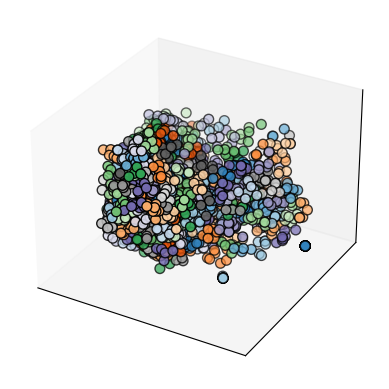

In [419]:
from matplotlib import pyplot as plt

reduction_name = 'Isomap3d'
reduced_vectors = reduced_embeddings[reduction_name]
clusterer = KMeans(init='k-means++', n_clusters = 500, n_init=10)
clusters = clusterer.fit(reduced_vectors)
cluster_id = clusters.labels_

df_all['cluster'] = clusters.labels_
df_labeled = df_all[~df_all.label.isna()]
metrics_out = calc_metrics(df_labeled)
context_dict = {
    'method':name, 
    'reduction method': reduction_name,
    '# of dimensions' : reduced_vectors.shape[1],
    '# of clusters': len(np.unique(clusters.labels_))
}
print(context_dict | metrics_out)

plt.figure()

ax = plt.axes(projection="3d")

im = ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], c=cluster_id[:], cmap='tab20c', edgecolor='k', label=index_name, marker='o', s=50)

#plt.title(f'{reduction_name}')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.show()
    

### Perform kmeans clustering with n=500

{'method': 'LLE', 'reduction method': 'none', '# of dimensions': 768, '# of clusters': 500, 'homogeneity': 0.6613357317257492, 'completeness': 0.10046948280043383, 'v_measure': 0.17443844609348974, 'cross-entropy': 0.2687753632303082}


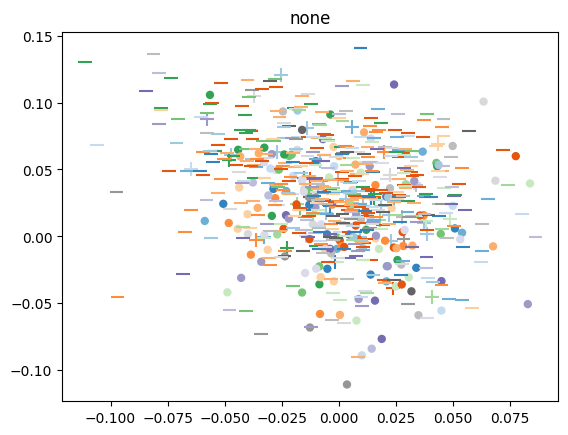

In [154]:
from matplotlib import pyplot as plt

reduction_name = 'none'
reduced_vectors = reduced_embeddings[reduction_name]
clusterer = AgglomerativeClustering(distance_threshold=1.25, compute_full_tree = True, n_clusters = None, linkage='complete')
clusterer = KMeans(init='k-means++', n_clusters = 500, n_init=50)
clusters = clusterer.fit(reduced_vectors)
cluster_id = clusters.labels_

df_all['cluster'] = clusters.labels_
df_labeled = df_all[~df_all.label.isna()]
metrics_out = calc_metrics(df_labeled)
context_dict = {
    'method':name, 
    'reduction method': reduction_name,
    '# of dimensions' : reduced_vectors.shape[1],
    '# of clusters': len(np.unique(clusters.labels_))
}
print(context_dict | metrics_out)
index_dict = { 
    'positive' : df_all[df_all.label==1].chunk_id,
    'neutral' : df_all[df_all.label==0].chunk_id,
    'negative' : df_all[df_all.label==-1].chunk_id
}
markers = ['+', '.', '_']

plt.figure()

for i, (index_name, indexes) in enumerate(index_dict.items()):
    im = plt.scatter(reduced_vectors[indexes, 0], reduced_vectors[indexes, 1], c=cluster_id[indexes], cmap='tab20c', label=index_name, marker=markers[i], s=100)
plt.title(f'{reduction_name}')
plt.show()
    

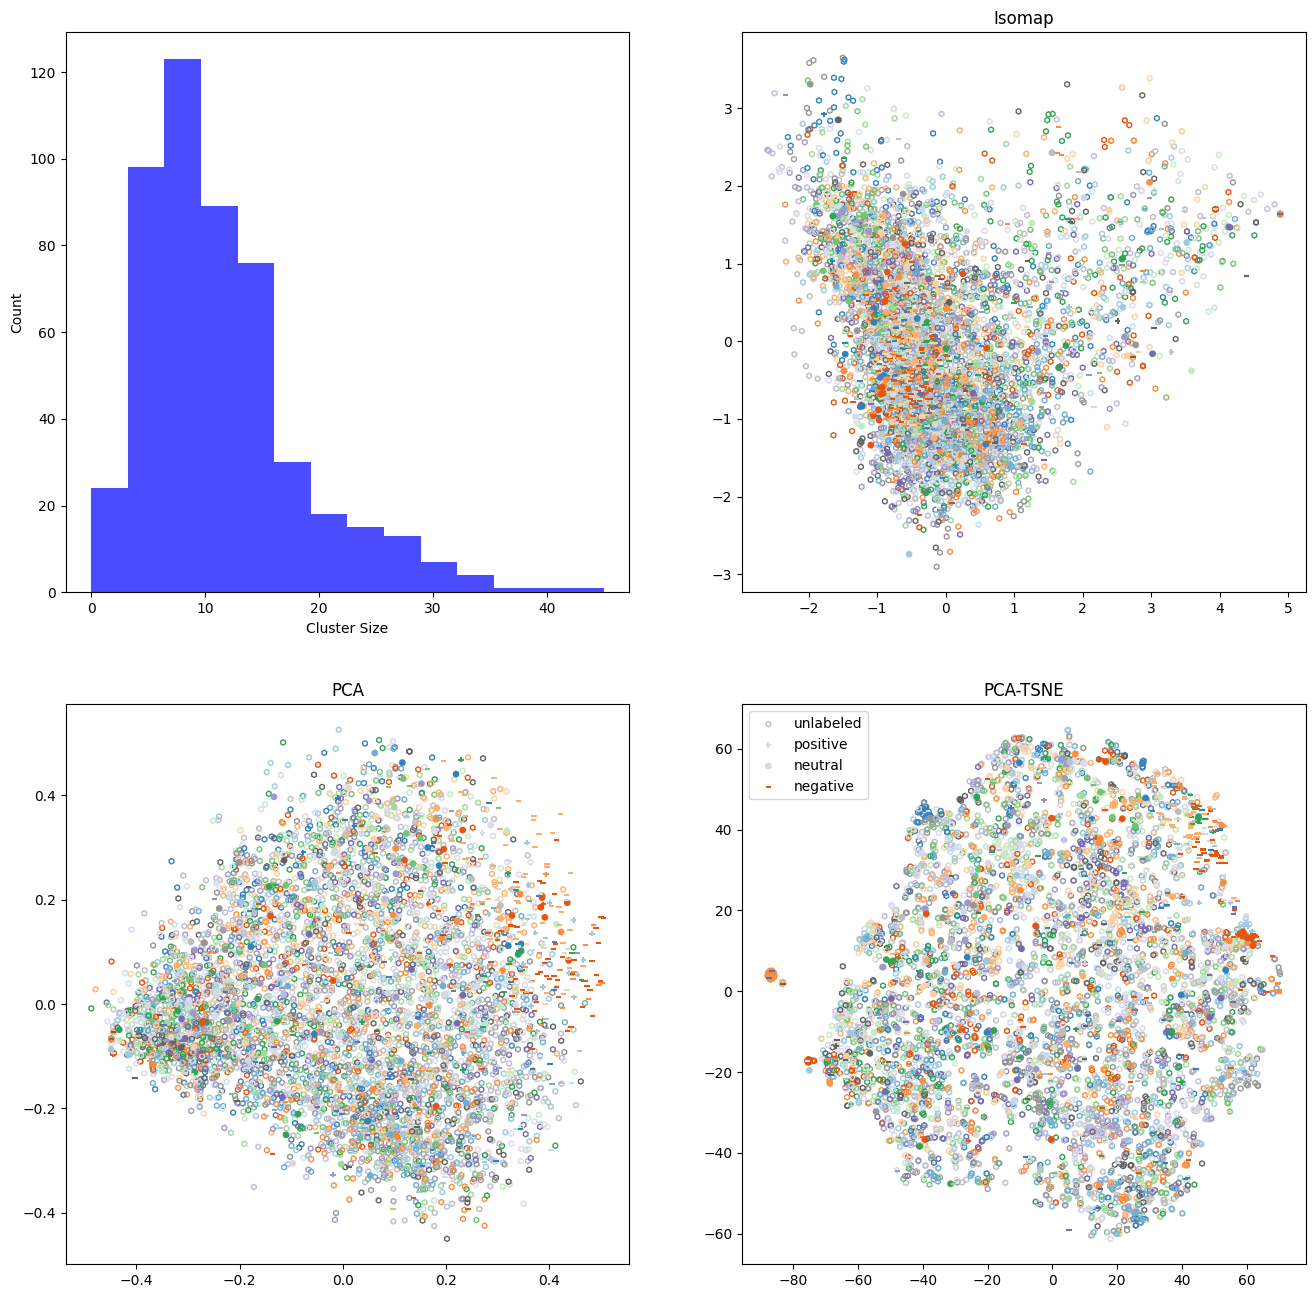

In [157]:
reduction_names = ['Isomap', 'PCA', 'PCA-TSNE']
cluster_id = df_all.sort_values('chunk_id').cluster
marker_size = 15

fig = plt.figure(figsize=(16,16))

cluster_sizes = cluster_id.reset_index().groupby('cluster').count()
ax = fig.add_subplot(2, 2, 1)
# Make a histogram of cluster sizes
plt.hist(cluster_sizes.values, bins=list(np.linspace(0, cluster_sizes.max().values+1, 15).T[0]), color='b', alpha=0.7)
# Add a vertical line at 0
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Count')

for subplot_id, reduction_name in enumerate(reduction_names):
    reduced_vectors = reduced_embeddings[reduction_name]

    index_dict = { 
        'unlabeled' : df_all[df_all.label.isna()].chunk_id.values,
        'positive' : df_all[df_all.label==1].chunk_id.values,
        'neutral' : df_all[df_all.label==0].chunk_id.values,
        'negative' : df_all[df_all.label==-1].chunk_id.values
    }
    markers = ["h",'+', 'o', '_']

    ax = fig.add_subplot(2, 2, subplot_id+2)

    for i, (index_name, indexes) in enumerate(index_dict.items()):
        if i==0:
            im = ax.scatter(reduced_vectors[indexes, 0], reduced_vectors[indexes, 1],  edgecolors = plt.cm.tab20c(cluster_id[indexes]%20), facecolors='none', label=index_name, marker=markers[i], s=marker_size)
            continue
        im = ax.scatter(reduced_vectors[indexes, 0], reduced_vectors[indexes, 1], c=cluster_id[indexes], cmap='tab20c', label=index_name, marker=markers[i], s=marker_size)
    ax.set_title(f'{reduction_name}')
plt.legend()
plt.show()

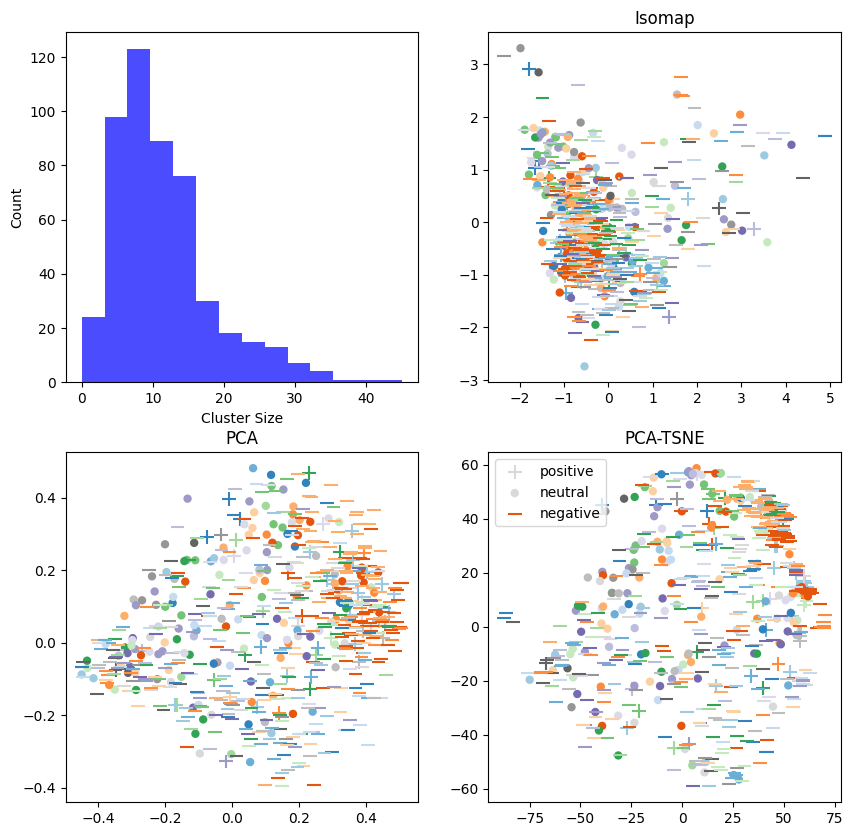

In [158]:
reduction_names = ['Isomap', 'PCA', 'PCA-TSNE']
cluster_id = df_all.sort_values('chunk_id').cluster

fig = plt.figure(figsize=(10,10))

cluster_sizes = cluster_id.reset_index().groupby('cluster').count()
ax = fig.add_subplot(2, 2, 1)
# Make a histogram of cluster sizes
plt.hist(cluster_sizes.values, bins=list(np.linspace(0, cluster_sizes.max().values+1, 15).T[0]), color='b', alpha=0.7)
# Add a vertical line at 0
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Count')

for subplot_id, reduction_name in enumerate(reduction_names):
    reduced_vectors = reduced_embeddings[reduction_name]

    index_dict = { 
        'positive' : df_all[df_all.label==1].chunk_id.values,
        'neutral' : df_all[df_all.label==0].chunk_id.values,
        'negative' : df_all[df_all.label==-1].chunk_id.values
    }
    markers = ['+', '.', '_']

    ax = fig.add_subplot(2, 2, subplot_id+2)

    for i, (index_name, indexes) in enumerate(index_dict.items()):
        im = ax.scatter(reduced_vectors[indexes, 0], reduced_vectors[indexes, 1], c=cluster_id[indexes], cmap='tab20c', label=index_name, marker=markers[i], s=100)
    ax.set_title(f'{reduction_name}')
plt.legend()
plt.show()

#### Convert to dict and save

In [402]:
clusters_dict = clusters.__dict__
for key, value in clusters_dict.items():
    if type(value) in [np.ndarray, np.array]:
        clusters_dict[key] = value.tolist()
print(clusters_dict.keys())

dict_keys(['n_clusters', 'init', 'max_iter', 'tol', 'n_init', 'verbose', 'random_state', 'copy_x', 'algorithm', 'n_features_in_', '_tol', '_n_init', '_algorithm', '_n_threads', 'cluster_centers_', '_n_features_out', 'labels_', 'inertia_', 'n_iter_'])


In [403]:
import json
with open('kmeans_n500_all_embeddings.json','w') as f:
    json.dump(clusters_dict, f)

## Run retrieval using clusters

#### Construct test docs from labeled dataset of 90 chunks and 3 questions

In [23]:
labeled_set_df = pd.read_csv('../../data/best_buy/questions_statements_labels_all_questions.csv')
print(labeled_set_df.columns)
test_docs_df = labeled_set_df[['statement','reddit_id',
       'aware_post_type', 'aware_created_ts', 'reddit_link_id',
       'reddit_parent_id', 'reddit_permalink', 'reddit_subreddit']].drop_duplicates()
test_docs_df = test_docs_df[['reddit_id', 'statement']].merge(all_chunks_df[list(set(all_chunks_df.columns)-{'statement'})], on=['reddit_id'], how = 'left')
loader = DataFrameLoader(test_docs_df, 'statement')
test_docs = loader.load()
test_docs

Index(['Unnamed: 0', 'statement', 'question',
       'What are the most common reasons for employees to leave Best Buy?',
       'Do employees feel understaffed?',
       'What do Best Buy employees think of the company?', 'reddit_id',
       'aware_post_type', 'aware_created_ts', 'reddit_link_id',
       'reddit_parent_id', 'reddit_permalink', 'reddit_subreddit'],
      dtype='object')


[Document(page_content='![gif](giphy|znRstrOYuirrW)', metadata={'reddit_id': 'ju59a0l', 'reddit_link_id': 't3_15e1vvl', 'reddit_parent_id': 't3_15e1vvl', 'reddit_permalink': '/r/BestBuyWorkers/comments/15e1vvl/customer_posts_are_disallowed_on_this_subreddit/ju59a0l/', 'reddit_subreddit': 'BestBuyWorkers', 'aware_post_type': 'comment', 'chunk_id': 2888, 'aware_created_ts': '2023-07-30T21:11:35'}),
 Document(page_content='#shockedpikachuface', metadata={'reddit_id': 'hhgbgps', 'reddit_link_id': 't3_qafhhx', 'reddit_parent_id': 't1_hh3zf24', 'reddit_permalink': '/r/BestBuyWorkers/comments/qafhhx/we_can_improve_our_working_conditions_by_working/hhgbgps/', 'reddit_subreddit': 'BestBuyWorkers', 'aware_post_type': 'comment', 'chunk_id': 1136, 'aware_created_ts': '2021-10-21T00:06:32'}),
 Document(page_content='12 hr shift here too. Normal pay man', metadata={'reddit_id': 'iwshpu5', 'reddit_link_id': 't3_yy085z', 'reddit_parent_id': 't3_yy085z', 'reddit_permalink': '/r/BestBuyWorkers/comments/

In [188]:
doc_inds = [all_docs.index(doc) for doc in test_docs]
print(doc_inds)

[2888, 1136, 392, 1498, 745, 3258, 3671, 4851, 4944, 944, 4855, 2803, 1113, 686, 4059, 1884, 5254, 419, 2254, 2370, 5210, 2579, 1276, 1903, 1712, 1243, 5306, 4308, 623, 3633, 2574, 4581, 1213, 3397, 3252, 2053, 2214, 4803, 2914, 3897, 2764, 4276, 2019, 4014, 1154, 2474, 404, 3351, 4972, 1923, 327, 274, 3758, 4367, 2990, 973, 1014, 409, 5366, 1551, 4482, 2795, 1583, 2203, 4392, 1081, 5466, 5454, 1993, 2413, 1088, 2305, 5130, 3719, 1681, 4194, 3684, 1580, 4518, 2102, 939, 1112, 3020, 4884, 3263, 4781, 111, 352, 5644]


#### Define functions to calculate Retrieval Quality

In [24]:
from sklearn.metrics import f1_score, recall_score, precision_score
from typing import List, Any, Dict

def parse_retriever_element(elem: Dict[str, Any]):
    return {'statement':elem['document'].page_content, 'score':elem['score']} | elem['document'].metadata

def construct_evaluation_df(labeled_set_df: pd.DataFrame, question: str, output: List[Dict[str, Any]]) -> pd.DataFrame:
    df_pred = pd.DataFrame([parse_retriever_element(elem) for elem in output])
    df_pred['retrieved'] = 1
    return labeled_set_df.drop_duplicates()[['statement',question]].rename(columns={question:'label'}).merge(df_pred, how = 'outer', on='statement').fillna(0)

def calc_quality_measures(labeled_set_df: pd.DataFrame, retrieved_docs: list, question: str) -> Dict[str, float]:
    eval_df = construct_evaluation_df(labeled_set_df, question, retrieved_docs)
    f1 = f1_score(eval_df['label'], eval_df['retrieved'])
    recall = recall_score(eval_df['label'], eval_df['retrieved'])
    precision = precision_score(eval_df['label'], eval_df['retrieved'])
    return {
        'f1':f1, 
        'recall':recall, 
        'precision':precision
    }




### Display distribution of labels of evaluation set

### 

In [25]:
test_questions = [
    'What are the most common reasons for employees to leave Best Buy?',
    'Do employees feel understaffed?',
    'What do Best Buy employees think of the company?'
]
labeled_set_df[test_questions]

What are the most common reasons for employees to leave Best Buy?  \
0                                                 0.0                   
1                                                 0.0                   
2                                                 0.0                   
3                                                 0.0                   
4                                                 0.0                   
..                                                ...                   
85                                                0.0                   
86                                                0.0                   
87                                                1.0                   
88                                                0.0                   
89                                                0.0                   

    Do employees feel understaffed?  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               1.0   
..                              ...   
85                              0.0   
86                              0.0   
87                              1.0   
88                              0.0   
89                              0.0   

    What do Best Buy employees think of the company?  
0                                                0.0  
1                                                0.0  
2                                                0.0  
3                                                0.0  
4                                                1.0  
..                                               ...  
85                                               0.0  
86                                               0.0  
87                                               1.0  
88                                               0.0  
89                                               0.0  

[90 rows x 3 columns]

In [27]:
counts = labeled_set_df[test_questions].apply(lambda x: x.value_counts())
df = pd.DataFrame()
for question in counts.columns:
    temp_df = counts.reset_index(names=['Label'])[['Label',question]].rename(columns={question:'Count'})
    temp_df['Question'] = question
    df = pd.concat((df, temp_df))
df = df.replace({0:'Irrelevant', 1:'Relevant'})
df

Label  Count                                           Question
0  Irrelevant     73  What are the most common reasons for employees...
1    Relevant     16  What are the most common reasons for employees...
0  Irrelevant     81                    Do employees feel understaffed?
1    Relevant      8                    Do employees feel understaffed?
0  Irrelevant     63   What do Best Buy employees think of the company?
1    Relevant     26   What do Best Buy employees think of the company?

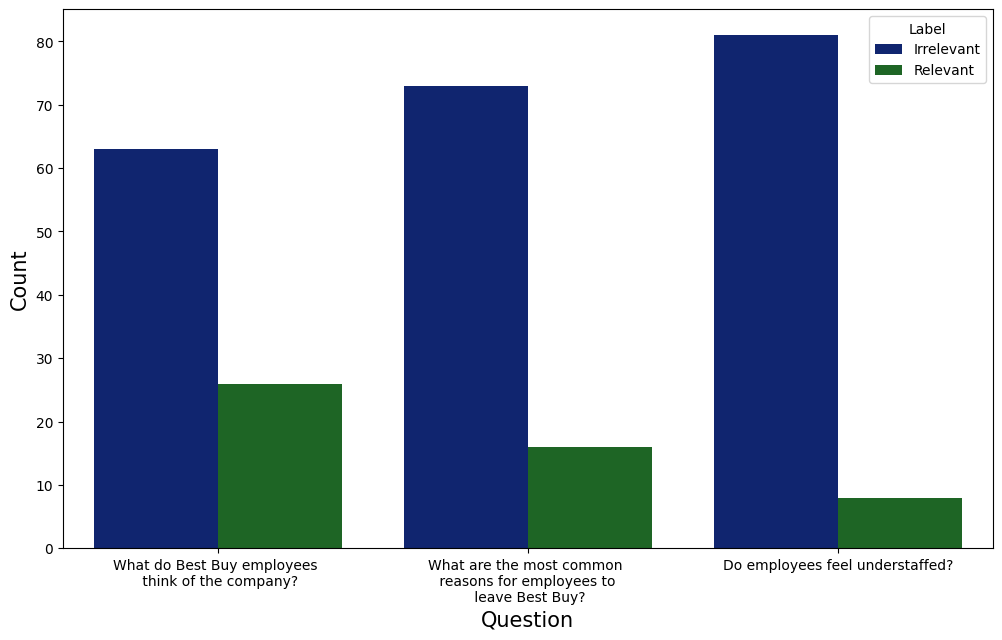

In [491]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.util.string_formatting import wrap_text

color_palette = sns.color_palette("dark")
color_palette.pop(1)
# Calculate the total count of 0s and 1s for each column
counts = labeled_set_df[test_questions].apply(lambda x: x.value_counts())
df = pd.DataFrame()
for question in counts.columns:
    temp_df = counts.reset_index(names=['Label'])[['Label',question]].rename(columns={question:'Count'})
    temp_df['Question'] = wrap_text(question)
    df = pd.concat((df, temp_df))
df = df.replace({0:'Irrelevant', 1:'Relevant'})


# Create a bar plot using seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x='Question', y='Count', hue = 'Label', data = df, palette=color_palette)
plt.xlabel('Question', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### Construct Cluster Retriever and Custom "Naive Retriever; load documents

In [342]:
from src.retriever import ClusterRetrieverCentroid
cluster_labels = clusters.labels_
retr = ClusterRetrieverCentroid(
    test_docs, 
    'all-mpnet-base-v1', 
    'cosine-similarity',
    clusters = cluster_labels,
    cluster_docs = all_docs,
    clustered_embeddings = embeddings
)
custom_retr = CustomRetriever(test_docs, 'all-mpnet-base-v1', 'cosine-similarity')

In [343]:
retr.load_documents()
custom_retr.load_documents()

### Run retrieval over a number of documents and calculate quality measures

In [339]:
test_questions = labeled_set_df.question.unique()

In [373]:
outputs = []
n_docs = 10
for n_docs in [5,10,20, 30]:
    for question in test_questions:
        retrieved_documents = retr.retrieve(question, 0.5, n=n_docs)
        outputs.append(calc_quality_measures(labeled_set_df, retrieved_documents, question)| {'method': 'cluster', 'question': question, 'retrieved_docs':n_docs})
        custom_docs = custom_retr.retrieve(question, n=n_docs)
        outputs.append(calc_quality_measures(labeled_set_df, custom_docs, question)| {'method': 'custom', 'question': question, 'retrieved_docs':n_docs})    
df_out = pd.DataFrame(outputs)

f1    recall  precision   method  \
0   0.322581  0.192308   1.000000  cluster   
1   0.258065  0.153846   0.800000   custom   
2   0.476190  0.312500   1.000000  cluster   
3   0.380952  0.250000   0.800000   custom   
4   0.666667  0.500000   1.000000  cluster   
5   0.769231  0.625000   1.000000   custom   
6   0.500000  0.346154   0.900000  cluster   
7   0.500000  0.346154   0.900000   custom   
8   0.538462  0.437500   0.700000  cluster   
9   0.538462  0.437500   0.700000   custom   
10  0.666667  0.500000   1.000000  cluster   
11  0.666667  0.750000   0.600000   custom   
12  0.585366  0.461538   0.800000  cluster   
13  0.652174  0.576923   0.750000   custom   
14  0.571429  0.500000   0.666667  cluster   
15  0.555556  0.625000   0.500000   custom   
16  0.666667  0.500000   1.000000  cluster   
17  0.428571  0.750000   0.300000   custom   
18  0.585366  0.461538   0.800000  cluster   
19  0.678571  0.730769   0.633333   custom   
20  0.571429  0.500000   0.666667  cluster   
21  0.565217  0.812500   0.433333   custom   
22  0.666667  0.500000   1.000000  cluster   
23  0.421053  1.000000   0.266667   custom   

                                             question  retrieved_docs  
0    What do Best Buy employees think of the company?               5  
1    What do Best Buy employees think of the company?               5  
2   What are the most common reasons for employees...               5  
3   What are the most common reasons for employees...               5  
4                     Do employees feel understaffed?               5  
5                     Do employees feel understaffed?               5  
6    What do Best Buy employees think of the company?              10  
7    What do Best Buy employees think of the company?              10  
8   What are the most common reasons for employees...              10  
9   What are the most common reasons for employees...              10  
10                    Do employees feel understaffed?              10  
11                    Do employees feel understaffed?              10  
12   What do Best Buy employees think of the company?              20  
13   What do Best Buy employees think of the company?              20  
14  What are the most common reasons for employees...              20  
15  What are the most common reasons for employees...              20  
16                    Do employees feel understaffed?              20  
17                    Do employees feel understaffed?              20  
18   What do Best Buy employees think of the company?              30  
19   What do Best Buy employees think of the company?              30  
20  What are the most common reasons for employees...              30  
21  What are the most common reasons for employees...              30  
22                    Do employees feel understaffed?              30  
23                    Do employees feel understaffed?              30

In [379]:
df_out = pd.DataFrame(outputs)
df_summary = df_out.drop(columns=['question']).groupby(['retrieved_docs', 'method']).agg({''}).rename({'custom':'naive'}).rename(columns={'method':'Method'})

In [426]:
df_out.replace({'custom':'Naive', 'cluster':'Cluster'})

f1    recall  precision   method  \
0   0.322581  0.192308   1.000000  Cluster   
1   0.258065  0.153846   0.800000    Naive   
2   0.476190  0.312500   1.000000  Cluster   
3   0.380952  0.250000   0.800000    Naive   
4   0.666667  0.500000   1.000000  Cluster   
5   0.769231  0.625000   1.000000    Naive   
6   0.500000  0.346154   0.900000  Cluster   
7   0.500000  0.346154   0.900000    Naive   
8   0.538462  0.437500   0.700000  Cluster   
9   0.538462  0.437500   0.700000    Naive   
10  0.666667  0.500000   1.000000  Cluster   
11  0.666667  0.750000   0.600000    Naive   
12  0.585366  0.461538   0.800000  Cluster   
13  0.652174  0.576923   0.750000    Naive   
14  0.571429  0.500000   0.666667  Cluster   
15  0.555556  0.625000   0.500000    Naive   
16  0.666667  0.500000   1.000000  Cluster   
17  0.428571  0.750000   0.300000    Naive   
18  0.585366  0.461538   0.800000  Cluster   
19  0.678571  0.730769   0.633333    Naive   
20  0.571429  0.500000   0.666667  Cluster   
21  0.565217  0.812500   0.433333    Naive   
22  0.666667  0.500000   1.000000  Cluster   
23  0.421053  1.000000   0.266667    Naive   

                                             question  retrieved_docs  
0    What do Best Buy employees think of the company?               5  
1    What do Best Buy employees think of the company?               5  
2   What are the most common reasons for employees...               5  
3   What are the most common reasons for employees...               5  
4                     Do employees feel understaffed?               5  
5                     Do employees feel understaffed?               5  
6    What do Best Buy employees think of the company?              10  
7    What do Best Buy employees think of the company?              10  
8   What are the most common reasons for employees...              10  
9   What are the most common reasons for employees...              10  
10                    Do employees feel understaffed?              10  
11                    Do employees feel understaffed?              10  
12   What do Best Buy employees think of the company?              20  
13   What do Best Buy employees think of the company?              20  
14  What are the most common reasons for employees...              20  
15  What are the most common reasons for employees...              20  
16                    Do employees feel understaffed?              20  
17                    Do employees feel understaffed?              20  
18   What do Best Buy employees think of the company?              30  
19   What do Best Buy employees think of the company?              30  
20  What are the most common reasons for employees...              30  
21  What are the most common reasons for employees...              30  
22                    Do employees feel understaffed?              30  
23                    Do employees feel understaffed?              30

### Plot performance of Cluster Method vs Naive Method

Text(0, 0.5, 'F1 Score')

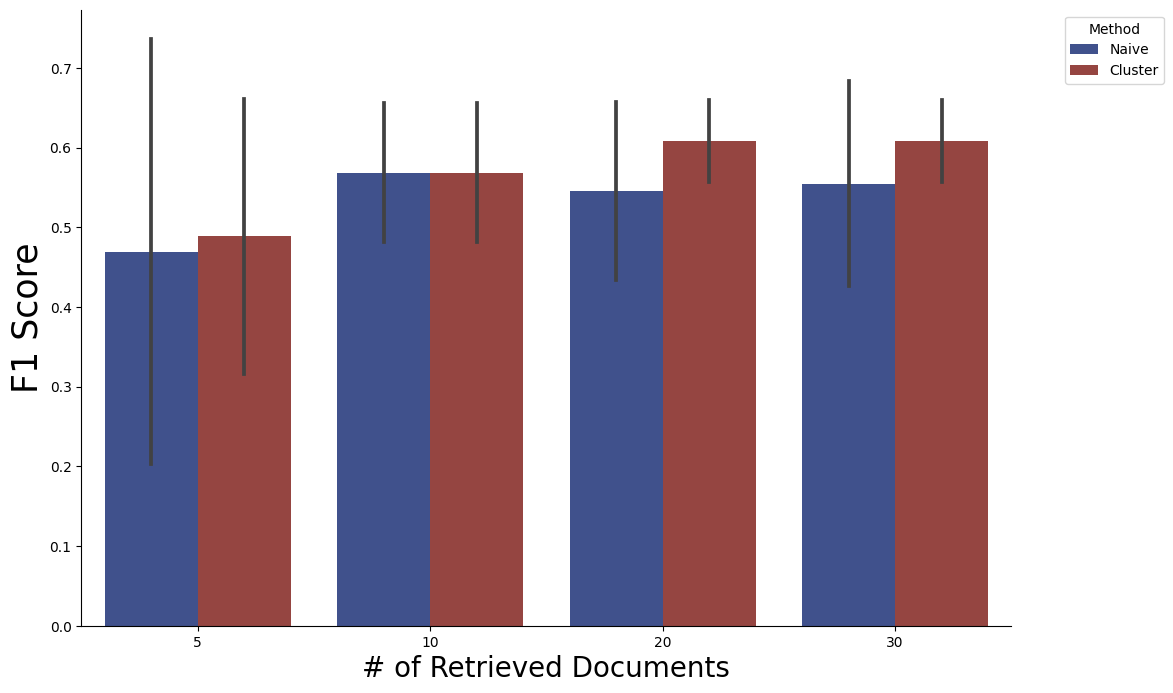

In [474]:
# Plot df_summary
evaluation_metric = 'f1'

color_palette = sns.color_palette("dark")
color_palette.pop(1)
color_palette.pop(1)
plt.figure(figsize=(12,8))
ax = sns.barplot(x="retrieved_docs", y=evaluation_metric, hue="method",
    data=df_out.sort_values('method', ascending=False).replace({'custom':'Naive', 'cluster':'Cluster'}), errorbar='sd', palette=color_palette, alpha=0.8)
ax.spines[['right', 'top']].set_visible(False)
plt.legend(title='Method',
            bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('# of Retrieved Documents', fontsize=20)
plt.ylabel('F1 Score', fontsize=25)